In [22]:
import cPickle as pickle
import os, sys, random
sys.path.append('/Users/matt.meng/dev/seq2seq_model')
import matplotlib.pyplot as plt
%matplotlib inline  


In [2]:
import pandas as pd
from data_preprocess import tokenize_title_column, convert_text_JSON_to_csv, process_title_column, \
process_title_column_by_spacy, create_selected_vocab_dict, process_title_with_token_dict, create_crambled_training

### the title processing steps

In [3]:
data_path = '/Users/matt.meng'
file_name = 'insights_selected_articles_20170818_20170926.json'
meta_data_file_name = 'meta_title_data.csv'
delimiter = '\t\t'

In [5]:
#'''
convert_text_JSON_to_csv(os.path.join(data_path, file_name),
                         os.path.join(data_path, meta_data_file_name),
                         delimiter)
#'''

finished processing 40000 rows using 3.77 seconds
finished processing 80000 rows using 7.50 seconds
finished processing 120000 rows using 11.30 seconds
finished processing 160000 rows using 15.00 seconds
finished processing 200000 rows using 18.55 seconds
finished processing 240000 rows using 22.22 seconds
finished processing 280000 rows using 25.92 seconds
finished processing 320000 rows using 30.10 seconds
finished processing 360000 rows using 34.31 seconds
finished processing 400000 rows using 38.16 seconds
finished processing 440000 rows using 42.65 seconds
finished processing 480000 rows using 46.99 seconds
finished processing 520000 rows using 52.00 seconds
finished processing 560000 rows using 56.72 seconds
finished processing 600000 rows using 60.91 seconds
finished processing 640000 rows using 64.79 seconds
finished processing 680000 rows using 69.26 seconds
finished processing 720000 rows using 73.60 seconds
finished processing 760000 rows using 77.40 seconds
finished process

In [7]:
data = pd.read_csv(os.path.join(data_path, meta_data_file_name), index_col='url', delimiter=delimiter, encoding='utf-8')


/Users/matt.meng/.virtualenvs/kaggle/lib/python2.7/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [8]:
print data.shape
data.head()

(984000, 3)


,title,traffic,publisherId
url,,,
http://www.kgw.com/news/local/rescue-effort-underway-for-hikers-trapped-by-eagle-creek-fire/470354816,Rescue effort underway for hikers trapped by E...,636961,1037860
https://smartasset.com/retirement/the-top-11-cities-for-a-worktirement-2017-edition,The Top 11 Cities for a Worktirement - 2017 Ed...,4967,1040526
http://www.complex.com/pop-culture/2017/07/chrissy-teigen-response-kim-kardashian-cocaine-controversy,Chrissy Teigen Had an Incredible Response to t...,154611,1042924
http://www.womansworld.com/posts/recreated-photos-102484/photos/recreated-photos-5-157859,17 Photos of Recreated Family Moments That'll ...,17784,1075445
http://www.cbs.com/shows/bull/video/XdBBwmEq__oWkKnzq7IHnaPYl_bkr9X7/bull-it-s-classified/,Bull Video - It's Classified,1005,1041535


In [9]:
data.sort_values(['traffic'], ascending=False, inplace=True)

In [10]:
data.head()

,title,traffic,publisherId
url,,,
https://weather.com/storms/hurricane/news/hurricane-irma-bahamas-florida-georgia-carolinas-forecast,Hurricane Irma on Its Way to the Bahamas as a ...,11508824,1187
https://weather.com/storms/hurricane/news/hurricane-irma-united-states-hurricane-warning-puerto-rico-leeward-islands-0,Hurricane Irma on Its Way to the Bahamas as a ...,9787772,1187
http://newarena.com/nfl/ex-nfl-player-who-wanted-son-dead-17-years-ago-is-in-for-a-shocking-surprise/,Ex-NFL Player Who Wanted Son Dead 17 Years Ago...,9016715,1023235
https://weather.com/storms/hurricane/news/hurricane-harvey-forecast-gulf-coast-texas-louisiana,Harvey's Real Story Begins: 40 Inches of Rain ...,5055129,1187
https://weather.com/storms/hurricane/news/tropical-storm-hurricane-jose-forecast-atlantic,Tropical Storm Jose Strengthens in the Atlanti...,4401042,1187


#### check the duplicates

In [11]:
sum(data.index.duplicated())

44966

In [12]:
unique_data = data[~data.index.duplicated(keep='first')]

In [13]:
print unique_data.shape

(939034, 3)


####  tokenize the titles, remove non-Enligh URLs and titles

In [14]:
processed_column_name = 'processed_title'
pageView_column_name = 'traffic'
filtered_data = tokenize_title_column(unique_data, processed_column_name, pageView_column_name)

/Users/matt.meng/dev/seq2seq_model/data_preprocess.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data['title_word_counts'], data[processed_column_name] = zip(*data[title_column_name].map(basic_tokenizer))


finish the tokenization...


In [16]:
print filtered_data.shape
filtered_data.head()

(907372, 5)


,title,traffic,publisherId,title_word_counts,processed_title
url,,,,,
http://www.msn.com/en-us/news/breakingnews/live-coverage-from-cbs-news/ar-BBmYvYY,Live Coverage from CBS News,3174981,1023406,5,live coverage from cbs news
http://clark.com/personal-finance-credit/credit-freeze-and-thaw-guide/,Credit freeze and thaw guide,1555017,1016433,5,credit freeze and thaw guide
http://www.nbcmiami.com/news/local/Watch-Live-NBC-6-News-204316851.html,WATCH LIVE: NBC 6 News,811635,1030944,5,watch live nbc ## news
https://weather.com/tv/the-weather-channel-live/video/watch-the-weather-channel-live,Watch The Weather Channel Live,569573,1187,5,watch the weather channel live
http://www.msn.com/en-us/news/video/live-news-coverage-from-cbs-news/ar-BBmYvYY,Live Coverage from CBS News,547493,1023406,5,live coverage from cbs news


#### check the duplicated titles

In [17]:
titile_dict = {}
for title in filtered_data['processed_title']:
    titile_dict[title] = titile_dict.get(title, 0) + 1

In [18]:
sorted_titles = sorted(titile_dict.items(), key=lambda x: x[1], reverse=True)
print len(sorted_titles)

597661


In [19]:
sorted_titles[:5]

[('former tulsa principal pleads guilty to child porn charge - news## com',
  2055),
 ('espn updates fpi rankings after week ##', 510),
 ('big brother video - episode ## - cbs com', 389),
 ('## things to know for today', 136),
 ('ap top entertainment news at ## ## p m edt', 128)]

In [20]:
processed_column_name = 'processed_title'
pageView_column_name = 'traffic'

all_titles, vocab_dict = process_title_column(filtered_data, processed_column_name, pageView_column_name)


total 104820 words are tokenized from 597345 titles using 9.85 second


#### check the vocabulary frequency

In [21]:
vocab_dict.keys()[:10]

['fawn',
 'shimmell',
 'cowboys-themed',
 'artajo',
 'sowell',
 'sonja',
 'majczek',
 'omega-##',
 'woods',
 'clotted']

In [38]:
bin_num = 30

(array([ 3462.,  2454.,  1973.,  1756.,  1415.,  1278.,  1002.,  1013.,
          889.,   799.,   707.,   628.,   570.,   606.,   511.,   483.,
          475.,   401.,   353.,   351.,   339.,   304.,   329.,   305.,
          575.]),
 array([  5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,
         16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,
         27.,  28.,  29.,  30.]),
 <a list of 25 Patch objects>)

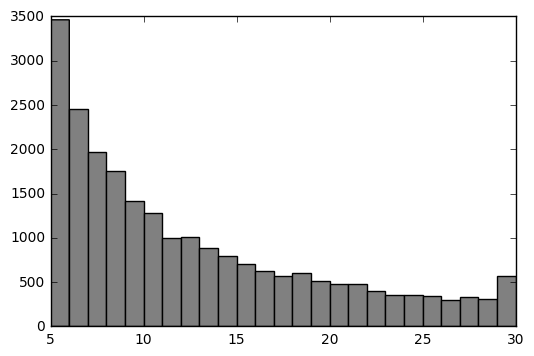

In [39]:
plt.hist(vocab_dict.values(), bins=(bin_num-5), range=[5, bin_num], facecolor='gray', align='mid')

In [52]:
count = 0
for key in vocab_dict:
    if vocab_dict[key] <= 8 and vocab_dict[key] >= 5:
        count += 1
        print key
        
print '\n', count

sonja
comically
localized
disobeying
sprague
snuggles
kopetsky
starboy
brainwashed
affiliates
dnp
wand
memphis-ucf
pinta
austen
seda
glenne
menlo
suwanee
roll-over
estroy
geva
probst
fnf##
ii-era
vegfest
douglasville
forrester
spiers
rememory
tri-rail
anniversaries
silky
shampoos
padded
tempted
clicked
hi-tech
nicely
pinot
guided-missile
fearlessly
fondled
humming
frk
boardroom
misconstrued
canoeing
honk
cavanaugh
qdoba
meiners
academia
heleringer
appropriately
senecas
out-of-town
advancement
har
unequivocally
lacroix
wvue
crowe
captiva
agassi
caskets
leominster
despised
ut-martin
grasping
perfumes
tannehill
prejean
smelling
loren
whoever
field-goal
tenacious
flatbed
lark
skewer
hindered
cheeseburgers
honour
galifianakis
ill-fated
darnell
handbags
milken
mudder
jiu
no-brainer
sorted
bedevil
sexual-assault
instability
re-enacts
keizer
crowdfunded
shepherdsville
lachlan
groomers
teardown
auroras
hidden-ball
nbclatino##
rehabbing
ultra-orthodox
ex-baylor
defensively
dunleavy
saint-tropez


In [18]:
'''
data['publisherId'] = data['publisherId'].astype(int).astype(str)
valid_publisher_ids = ['1001082', '1023406', '1003264', '1040522', '782', '1006541',
                           '1168', '1038583', '1021516', '580', '1020689', '1031851', '1001264',
                           '1039208', '1054980', '1018671', '1031841', '1031842', '1031852',
                           '1008941', '1003764', '1068057', '1038711', '1002628', '1031853',
                           '1021578', '1043813', '1010748', '1040526', '1005092', '612',
                           '1003870', '1001156', '1012083', '1017946', '1041479', '1027016',
                           '1010488', '1017947', '1010497', '1038582', '1045821', '1020968',
                           '1037842', '1029984', '723', '196', '1030941']

filtered_data = data.loc[data['publisherId'].isin(valid_publisher_ids), :]
unique_filtered_data = filtered_data[~filtered_data.index.duplicated(keep='first')]
print unique_filtered_data.shape

processed_column_name = 'processed_title'
pageView_column_name = 'traffic'
all_titles, vocab_dict = process_title_column_by_spacy(filtered_data, 'processed_title', 'traffic', skip_stop_words=True)
'''


"\ndata['publisherId'] = data['publisherId'].astype(int).astype(str)\nvalid_publisher_ids = ['1001082', '1023406', '1003264', '1040522', '782', '1006541',\n                           '1168', '1038583', '1021516', '580', '1020689', '1031851', '1001264',\n                           '1039208', '1054980', '1018671', '1031841', '1031842', '1031852',\n                           '1008941', '1003764', '1068057', '1038711', '1002628', '1031853',\n                           '1021578', '1043813', '1010748', '1040526', '1005092', '612',\n                           '1003870', '1001156', '1012083', '1017946', '1041479', '1027016',\n                           '1010488', '1017947', '1010497', '1038582', '1045821', '1020968',\n                           '1037842', '1029984', '723', '196', '1030941']\n\nfiltered_data = data.loc[data['publisherId'].isin(valid_publisher_ids), :]\nunique_filtered_data = filtered_data[~filtered_data.index.duplicated(keep='first')]\nprint unique_filtered_data.shape\n\nproces

#### check the `vocab_ditc` content

In [48]:
sorted_pairs = sorted(vocab_dict.items(), key=lambda x: x[1], reverse=True)

In [49]:
sorted_pairs[:10]

[('to', 154902),
 ('##', 139605),
 ('in', 137737),
 ('the', 116250),
 ('of', 90398),
 ('for', 83226),
 ('on', 56775),
 ('and', 46744),
 ('with', 41921),
 ('at', 39915)]

### create the `token_dict` and the scrambled data

In [44]:
_PAD = b"_PAD"
_GO = b"_GO"
_EOS = b"_EOS"
_UNK = b"_UNK"
_START_VOCAB = [_PAD, _GO, _EOS, _UNK]

TOKEN_DICT = {}
REVERSE_TOKEN_DICT = {}
for i in xrange(len(_START_VOCAB)):
    TOKEN_DICT[_START_VOCAB[i]] = i
    REVERSE_TOKEN_DICT[i] = _START_VOCAB[i]

In [53]:
UKN_index = len(TOKEN_DICT) - 1
token_dict, reverse_token_dict = create_selected_vocab_dict(vocab_dict, UKN_index, token_freq_threshold=9)
selected_content = process_title_with_token_dict(all_titles, token_dict, reverse_token_dict, UKN_index, UKN_frac_threshold=0.2)
processed_content = create_crambled_training(selected_content)

total 26841 unique tokens are included in the token dictionary...
total 545747 titles are included...
finish generating scrambled titles, ignore 0 titles..


### load the processed pickle and check the content

In [ ]:
data_path = '/Users/matt.meng'
#pickle_file = 'processed_titles_data.pkl'
pickle_file = 'lemmanized_no_stop_words_CBOW_data.pkl'
with open(os.path.join(data_path, pickle_file), 'r') as input_file:
     data = pickle.load(input_file)

In [ ]:
data.keys()

In [ ]:
training_list = data['training_list']
target_list = data['target_list']

In [ ]:
print len(training_list)

In [ ]:
training_list[:4]

In [ ]:
titles = data['titles']
token_dict = data['token_dict']
reverse_token_dict = data['reverse_token_dict']

In [ ]:
token_dict.keys()[:20]

In [ ]:
index = 50
map(reverse_token_dict.get, titles[index])

In [ ]:
'''
training_titles = data['training_titles']
target_titles = data['target_titles']

index = 20000
print training_titles[index]
print target_titles[index]
'''

### validate the DataGenerator with dual outputs

In [ ]:
from data_preprocess import TOKEN_DICT, _GO, _EOS
from data import DataGenerator, process_batch

In [ ]:
pickle_file = 'scramble_titles_data.pkl'
batch_size = 32
pickle_file_path = os.path.join(os.path.expanduser("~"), pickle_file)

## the dual_output test
#dataGen = DataGenerator(pickle_file_path)
dataGen = DataGenerator(pickle_file_path, True)
batches = dataGen.generate_sequence(batch_size)
training_batch, target_batch = next(batches)
  

In [ ]:
training_batch

In [ ]:
target_batch

In [ ]:
encoder_inputs_, encoder_inputs_length = process_batch([sequence + [TOKEN_DICT[_EOS]] for sequence in training_batch])
decoder_inputs_, decoder_inputs_length = process_batch([[TOKEN_DICT[_GO]] + sequence for sequence in target_batch])


In [ ]:
encoder_inputs_

In [ ]:
decoder_inputs_